In [58]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
warnings.filterwarnings("ignore")

In [32]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [33]:
train = pd.read_csv('./train.csv')
train

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [34]:
# # 추론 결과를 저장하기 위한 dataframe 생성
# results_df = pd.DataFrame(columns=['종목코드', 'final_return'])

# # train 데이터에 존재하는 독립적인 종목코드 추출
# unique_codes = train['종목코드'].unique()

# # 각 종목코드에 대해서 모델 학습 및 추론 반복
# for code in tqdm(unique_codes):
    
#     # 학습 데이터 생성
#     train_close = train[train['종목코드'] == code][['일자', '종가']]
#     train_close['일자'] = pd.to_datetime(train_close['일자'], format='%Y%m%d')
#     train_close.set_index('일자', inplace=True)
#     tc = train_close['종가']
    
#     # 모델 선언, 학습 및 추론
#     model = ARIMA(tc, order=(2, 1, 2))
#     model_fit = model.fit()
#     predictions = model_fit.forecast(steps=15) # 향후 15개의 거래일에 대해서 예측
    
#     # 최종 수익률 계산
#     final_return = (predictions.iloc[-1] - predictions.iloc[0]) / predictions.iloc[0]
    
#     # 결과 저장
#     results_df = results_df.append({'종목코드': code, 'final_return': final_return}, ignore_index=True)

In [35]:
# 제출할 떄 사용
# sample_submission = pd.read_csv('./sample_submission.csv')
# sample_submission
# baseline_submission = sample_submission[['종목코드']].merge(results_df[['종목코드', '순위']], on='종목코드', how='left')
# baseline_submission
# baseline_submission.to_csv('baseline_submission.csv', index=False)

In [36]:
submission = pd.read_csv('sample_submission.csv')
print(train.shape, submission.shape)

(988000, 8) (2000, 2)


In [37]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [38]:
print(train.head(5))
print(submission.head(5))
# test csv파일 만들기 미래에 그냥 아무 숫자나 날짜 데이터를 만들어서 실효셩 확인하기
print(train.tail(5))

         일자     종목코드     종목명     거래량     시가     고가     저가     종가
0  20210601  A060310      3S  166690   2890   2970   2885   2920
1  20210601  A095570  AJ네트웍스   63836   5860   5940   5750   5780
2  20210601  A006840   AK홀딩스  103691  35500  35600  34150  34400
3  20210601  A054620     APS  462544  14600  14950  13800  14950
4  20210601  A265520   AP시스템  131987  29150  29150  28800  29050
      종목코드  순위
0  A000020   1
1  A000040   2
2  A000050   3
3  A000070   4
4  A000080   5
              일자     종목코드     종목명      거래량    시가    고가    저가    종가
987995  20230530  A189980  흥국에프엔비   272284  3005  3035  2955  2980
987996  20230530  A000540    흥국화재    50218  3250  3255  3195  3215
987997  20230530  A003280    흥아해운   130664  1344  1395  1340  1370
987998  20230530  A037440      희림   141932  9170  9260  9170  9200
987999  20230530  A238490      힘스  2611843  6410  8220  6300  8220


In [39]:
print(train.info())
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988000 entries, 0 to 987999
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   일자      988000 non-null  int64 
 1   종목코드    988000 non-null  object
 2   종목명     988000 non-null  object
 3   거래량     988000 non-null  int64 
 4   시가      988000 non-null  int64 
 5   고가      988000 non-null  int64 
 6   저가      988000 non-null  int64 
 7   종가      988000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 60.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목코드    2000 non-null   object
 1   순위      2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


In [40]:
print(train.describe())
print(submission.describe())

                 일자           거래량            시가            고가            저가  \
count  9.880000e+05  9.880000e+05  9.880000e+05  9.880000e+05  9.880000e+05   
mean   2.021974e+07  7.734265e+05  2.587701e+04  2.634938e+04  2.542335e+04   
std    6.822396e+03  4.839914e+06  6.590845e+04  6.689822e+04  6.490307e+04   
min    2.021060e+07  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.021113e+07  3.653900e+04  3.775000e+03  3.865000e+03  3.700000e+03   
50%    2.022053e+07  1.140220e+05  8.630000e+03  8.810000e+03  8.470000e+03   
75%    2.022113e+07  3.672998e+05  2.130000e+04  2.180000e+04  2.085000e+04   
max    2.023053e+07  7.822434e+08  1.770000e+06  1.784000e+06  1.756000e+06   

                 종가  
count  9.880000e+05  
mean   2.600283e+04  
std    6.587082e+04  
min    8.500000e+01  
25%    3.890000e+03  
50%    8.700000e+03  
75%    2.140000e+04  
max    1.770000e+06  
                순위
count  2000.000000
mean   1000.500000
std     577.494589
min       1.00

In [41]:
train.isnull().sum()

일자      0
종목코드    0
종목명     0
거래량     0
시가      0
고가      0
저가      0
종가      0
dtype: int64

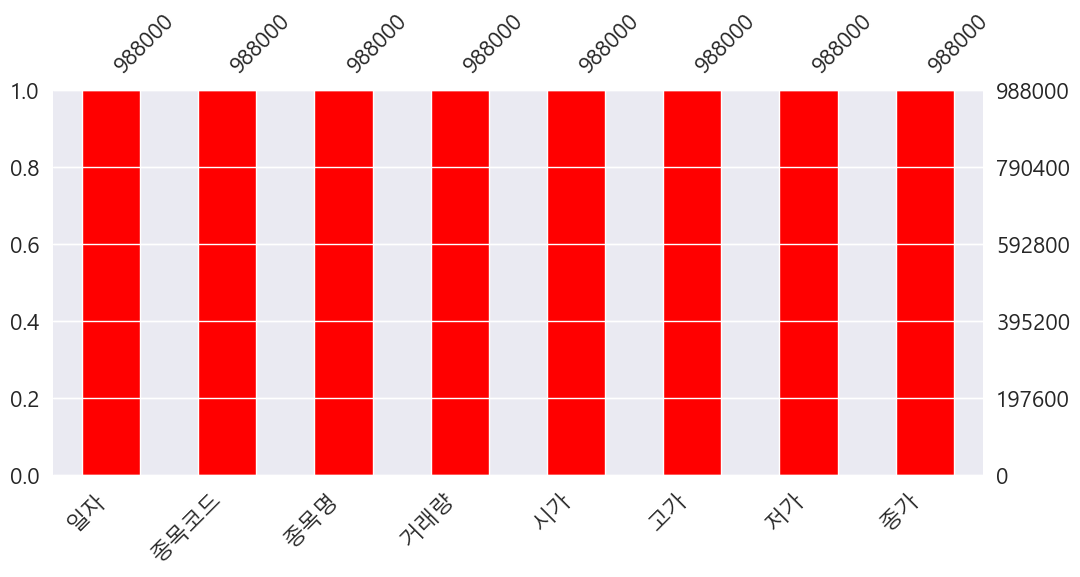

In [42]:
import missingno as msno
msno.bar(train, figsize=(12, 5), color='red')
plt.show()

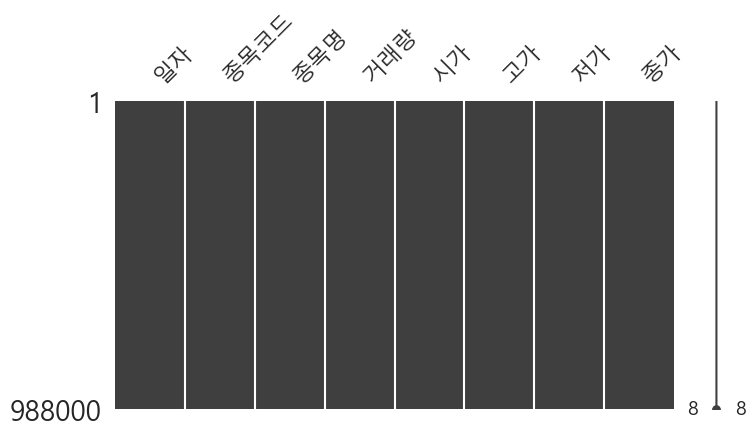

In [43]:
msno.matrix(train, figsize=(8,4))
plt.show()

In [44]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

ValueError: could not convert string to float: 'A060310'

<Figure size 800x500 with 0 Axes>

In [ ]:
train1 = train.drop(['종목명', '종목코드'], axis=1)
print(train1)

              일자      거래량     시가     고가     저가     종가
0       20210601   166690   2890   2970   2885   2920
1       20210601    63836   5860   5940   5750   5780
2       20210601   103691  35500  35600  34150  34400
3       20210601   462544  14600  14950  13800  14950
4       20210601   131987  29150  29150  28800  29050
...          ...      ...    ...    ...    ...    ...
987995  20230530   272284   3005   3035   2955   2980
987996  20230530    50218   3250   3255   3195   3215
987997  20230530   130664   1344   1395   1340   1370
987998  20230530   141932   9170   9260   9170   9200
987999  20230530  2611843   6410   8220   6300   8220

[988000 rows x 6 columns]


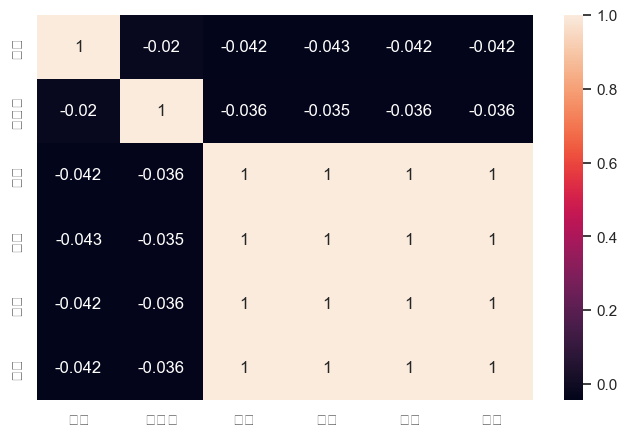

In [45]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.heatmap(train1.corr(), annot=True, cbar=True)
# sns.set(font_scale=0.8)
plt.show()

In [46]:
price_data = train['종가'].values
# print(price_data)
window_size = 20
# window_size 는 과거 기간의 주가 데이터에 기반하여 다음날의 종가를 예측할 것인가를 정하는 parameter 이다.
result_list = []
for i in range(len(price_data) - (window_size +1)):
    result_list.append(price_data[i: (i+window_size+1)])

normal_data = []
for window in result_list:
    window_list = [((float(p) / float(window[0]))-1) for p in window]
    normal_data.append(window_list)

result_list = np.array(normal_data)
print(result_list.shape[0], result_list.shape[1])

987979 21


In [47]:
row = int(round(result_list.shape[0] * 0.9))
train = result_list[:row, :]

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result_list[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result_list[row:, -1]

x_train.shape, x_test.shape

((889181, 20, 1), (98798, 20, 1))

In [62]:
model = Sequential()
model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 20, 20)            1760      
                                                                 
 lstm_5 (LSTM)               (None, 64)                21760     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23585 (92.13 KB)
Trainable params: 23585 (92.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=10,
          epochs=10)
model.save()

Epoch 1/10
49587/88919 [===============>..............] - ETA: 6:43 - loss: 375.8614

KeyboardInterrupt: 

3088/3088 [==============================] - 11s 4ms/step


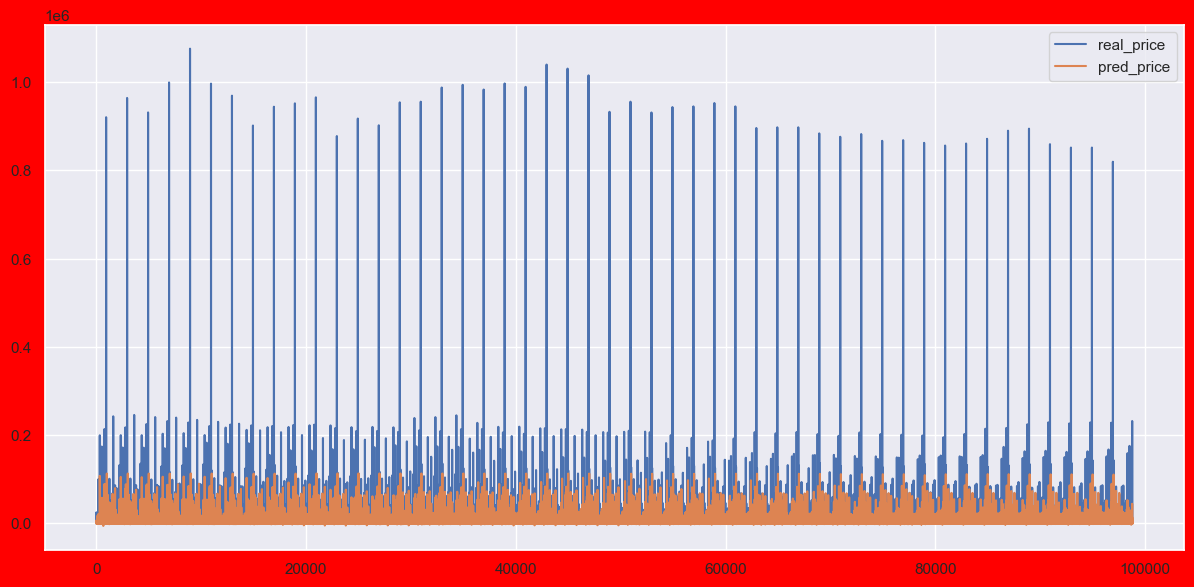

In [65]:
pred = model.predict(x_test)
pred_price=[]
for i in pred:
    pred_price.append((i+1)*window[0])

real_price = []
for i in y_test:
    real_price.append((i+1)*window[0])

fig = plt.figure(facecolor='red', figsize=(50, 15))
ax = fig.add_subplot(234)
ax.plot(real_price, label='real_price')
ax.plot(pred_price, label='pred_price')
ax.legend()
plt.show()